# Table of Contents
 <p><div class="lev1 toc-item"><a href="#DATA:" data-toc-modified-id="DATA:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DATA:</a></div><div class="lev1 toc-item"><a href="#exploration" data-toc-modified-id="exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>exploration</a></div><div class="lev2 toc-item"><a href="#plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)" data-toc-modified-id="plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-civilian-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-civilian-fire-arms-per-person-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>plot the average number of civilian fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-homicide-by-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-homicide-by-fire-arms-per-person-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>plot the average number of homicide by fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev1 toc-item"><a href="#Modeling" data-toc-modified-id="Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling</a></div><div class="lev2 toc-item"><a href="#fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person." data-toc-modified-id="fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person.-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them" data-toc-modified-id="Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Extra credit: calculate the confidence interval by hand and also plot them</a></div><div class="lev2 toc-item"><a href="#Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot." data-toc-modified-id="Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot.-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Use the stsatsmodels.gaphics package to plot the influence plot.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences" data-toc-modified-id="Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences</a></div><div class="lev2 toc-item"><a href="#Discuss-your-findings" data-toc-modified-id="Discuss-your-findings-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Discuss your findings</a></div>

**regression exercise**

**written by Federica B Bianco CUSP 2017**

**for PUI lecture on models and linear regression**

**investigate linear relationships between fire arm possession, homicides by fire arms, and mass shootings for different countries, considering also the country GDP**

# DATA: 

The Guardian firearms murders and ownership data. The relevans sheet is uploaded in the github repository as a csv file. Download it from there. Note: this dataset is from 2012.

**Extra credit**: download directly from google docs with a google API

https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/edit#gid=0

Number of mass shootings: find the link here https://datawrapper.dwcdn.net/pvLFI/4/

The world population by country find the download link here :
https://data.worldbank.org/indicator/SP.POP.TOTL

Remember that all read or downloads have to me reproducible.

Merge all datasets. After throwing away the irrelevant data it should look something like this (I renamed the GDP and the population as gdp" and "pop")

Throughout, when I ask you to include errors in plots or models, use Poisson statistics: the error is the square root of the number you are considering (e.g. this country has N fire arms +/- square root of N, or this country has Np [= N/population +/- (square root of N) / population] fire arms per person).

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from __future__  import print_function
from scipy import stats
import os

In [2]:
#download data
os.system("curl -O https://raw.githubusercontent.com/lingyielia/PUI2017_lz1714/master/HW5_lz1714/data/World_firearms_murders_and_ownership1.csv")
os.system("mv " + "World_firearms_murders_and_ownership1.csv " + os.getenv("PUIDATA"))
os.system("curl -O https://raw.githubusercontent.com/lingyielia/PUI2017_lz1714/master/HW5_lz1714/data/API_SP.POP.TOTL_DS2_en_csv_v2.csv")
os.system("mv " + "API_SP.POP.TOTL_DS2_en_csv_v2.csv " + os.getenv("PUIDATA"))
os.system("curl -O https://raw.githubusercontent.com/lingyielia/PUI2017_lz1714/master/HW5_lz1714/data/data-pvLFI.csv")
os.system("mv " + "data-pvLFI.csv " + os.getenv("PUIDATA"))
os.system("curl -O https://raw.githubusercontent.com/lingyielia/PUI2017_lz1714/master/HW5_lz1714/data/API_NY.GDP.MKTP.CD_DS2_en_csv_v2.csv")
os.system("mv " + "API_NY.GDP.MKTP.CD_DS2_en_csv_v2.csv " + os.getenv("PUIDATA"))

0

In [3]:
#read data
df1 = pd.read_csv(os.getenv("PUIDATA") + "/" + "World_firearms_murders_and_ownership1.csv")
df2 = pd.read_csv(os.getenv("PUIDATA") + "/" + "API_SP.POP.TOTL_DS2_en_csv_v2.csv", sep='\t')
df2.rename(columns = {'2012' : 'pop'}, inplace=True)
df3 = pd.read_csv(os.getenv("PUIDATA") + "/" + "data-pvLFI.csv")
df4 = pd.read_csv(os.getenv("PUIDATA") + "/" + "API_NY.GDP.MKTP.CD_DS2_en_csv_v2.csv", sep='\t')
df4.rename(columns = {'2012' : 'gdp'}, inplace=True)

In [4]:
result = df1.merge(df2, left_on='Country/Territory', right_on='Country Name', how='inner')
result = result.merge(df3, left_on='Country Name', right_on='Country', how='inner')
result = result.merge(df4, left_on='Country Name', right_on='Country Name', how='inner')
result.head()

,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms,Country Name,...,2007_y,2008_y,2009_y,2010_y,2011_y,gdp,2013_y,2014_y,2015_y,2016_y
0,Australia,AU,NSO,11.5,30.0,0.14,42.0,15.0,3050000.0,Australia,...,8.537650e+11,1.055330e+12,9.271680e+11,1.142880e+12,1.390560e+12,1.538190e+12,1.567180e+12,1.459600e+12,1.345380e+12,1.204620e+12
1,Austria,AT,CTS,29.5,18.0,0.22,14.0,30.4,2500000.0,Austria,...,3.864590e+11,4.276120e+11,3.975940e+11,3.902120e+11,4.290370e+11,4.074520e+11,4.282480e+11,4.383760e+11,3.769670e+11,3.864280e+11
2,Canada,CA,CTS,32.0,173.0,0.51,13.0,30.8,9950000.0,Canada,...,1.464980e+12,1.549130e+12,1.371150e+12,1.613460e+12,1.788650e+12,1.824290e+12,1.842630e+12,1.792880e+12,1.552810e+12,1.529760e+12
3,Denmark,DK,CTS,31.9,15.0,0.27,54.0,12.0,650000.0,Denmark,...,3.194230e+11,3.533610e+11,3.212410e+11,3.219950e+11,3.440030e+11,3.271490e+11,3.435840e+11,3.522970e+11,3.013080e+11,3.061430e+11
4,Finland,FI,CTS,19.8,24.0,0.45,4.0,45.3,2400000.0,Finland,...,2.553850e+11,2.837420e+11,2.514990e+11,2.478000e+11,2.736740e+11,2.567060e+11,2.699800e+11,2.726090e+11,2.323620e+11,2.367850e+11


In [5]:
print(result.columns)

Index(['Country/Territory', 'ISO code', 'Source', '% of homicides by firearm',
       'Number of homicides by firearm',
       'Homicide by firearm rate per 100,000 pop', 'Rank by rate of ownership',
       'Average firearms per 100 people',
       'Average total all civilian firearms', 'Country Name',
       ...
       '2007_y', '2008_y', '2009_y', '2010_y', '2011_y', 'gdp', '2013_y',
       '2014_y', '2015_y', '2016_y'],
      dtype='object', length=133)


In [6]:
df = result[['Country Name', 'Average total all civilian firearms', 'pop', 'gdp', 'Number of homicides by firearm', 'Country', 'Guns/100 inhabitants', 'Number of mass shootings']]

In [7]:
df.head()

,Country Name,Average total all civilian firearms,pop,gdp,Number of homicides by firearm,Country,Guns/100 inhabitants,Number of mass shootings
0,Australia,3050000.0,22728254.0,1.538190e+12,30.0,Australia,15.0,4
1,Austria,2500000.0,8429991.0,4.074520e+11,18.0,Austria,30.4,1
2,Canada,9950000.0,34750545.0,1.824290e+12,173.0,Canada,30.8,4
3,Denmark,650000.0,5591572.0,3.271490e+11,15.0,Denmark,12.0,0
4,Finland,2400000.0,5413971.0,2.567060e+11,24.0,Finland,45.3,2


# exploration

## plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)

Use Poisson statistics for the errorbars on the number of mass shootings (optional: include errors on the population, also as Poisson statistics)

Are there any points that look like they may be outilers?


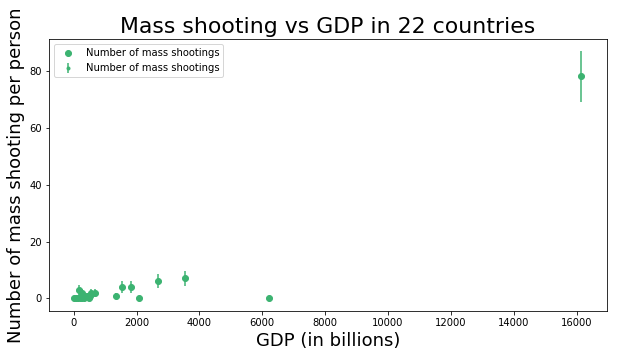

Figure 1. Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of mass shootings


In [8]:
fig = plt.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df.gdp / 1e9, df['Number of mass shootings'], color='mediumseagreen')
ax.errorbar(df.gdp / 1e9, df['Number of mass shootings'], 
            yerr = np.sqrt(df['Number of mass shootings'] * 1.0), fmt = '.', color='mediumseagreen')
ax.set_xlabel("GDP (in billions)", fontsize = 18)
ax.set_ylabel("Number of mass shooting per person", fontsize = 18)
ax.set_ylim()
ax.set_title("Mass shooting vs GDP in 22 countries", fontsize=22)
ax.legend()
plt.show()
print ("Figure 1. Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest number of mass shootings")


In [9]:
df['gdp_pp'] = df['gdp'] / df['pop'] #gdp per person

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
x = df['gdp_pp'][df['Country Name']=='United States']
x

21    51450.265608
Name: gdp_pp, dtype: float64

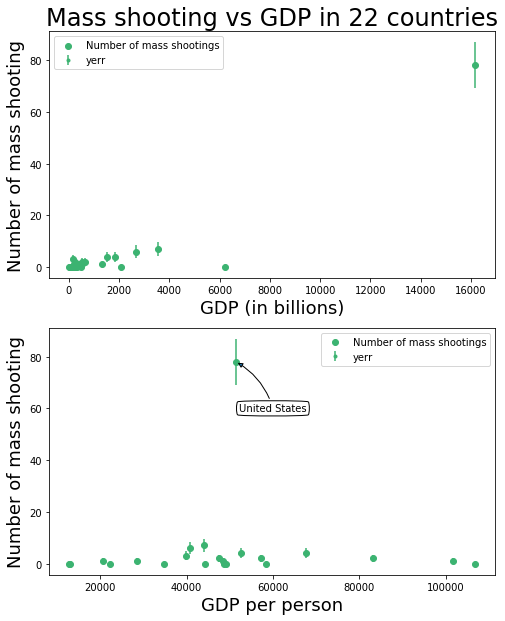

Figure 2. Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has the highest GDP and the highest number of mass shootings. USA does not have the highest GDP per person, but has highest mass shootings.


In [11]:
fig = plt.figure(figsize=(8,10)) 
ax1 = fig.add_subplot(211)

scatter = ax1.scatter(df['gdp']/ 1e9, df['Number of mass shootings'], color='mediumseagreen')
ax1.set_xlabel('GDP (in billions)', fontsize = 18)
ax1.set_ylabel('Number of mass shooting', fontsize = 18)
ax1.errorbar(df.gdp / 1e9, df['Number of mass shootings'], 
            yerr = np.sqrt(df['Number of mass shootings'] * 1.0), fmt = '.', color='mediumseagreen', label='yerr')
ax1.set_ylim()
ax1.legend()
plt.title("Mass shooting vs GDP in 22 countries", fontsize=24)

ax2 = fig.add_subplot(212)
scatter = ax2.scatter(df['gdp_pp'], df['Number of mass shootings'], color='mediumseagreen')
ax2.errorbar(df['gdp_pp'], df['Number of mass shootings'], 
            yerr = np.sqrt(df["Number of mass shootings"]*1.0), fmt = '.', color='mediumseagreen', label='yerr')
ax2.set_xlabel('GDP per person', fontsize = 18)
ax2.set_ylabel('Number of mass shooting', fontsize = 18)
ax2.set_ylim()
ax2.legend()
ax2.annotate('United States', 
             xy=(df['gdp_pp'][df['Country Name']=='United States'], df['Number of mass shootings'][df['Country Name']=='United States']), 
             xycoords='data', xytext=(60000,60), textcoords='data', size=10, va="center", ha="center",bbox=dict(boxstyle="round4", fc="w"),
                  arrowprops=dict(arrowstyle="-|>",
                                  connectionstyle="arc3,rad=0.2"))
#ax2.set_title("Mass shooting vs GDP in 22 countries", fontsize=22)

plt.show()
print ("Figure 2. Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has the highest GDP and the highest number of mass shootings. " +
       "USA does not have the highest GDP per person, but has highest mass shootings.")

## plot the average number of civilian fire arms per person
first without errors, then with errors. are there  points that look like outliers?

In [12]:
df['CivilianFireArms_pp'] = df["Average total all civilian firearms"] / df['pop'] * 1e3

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


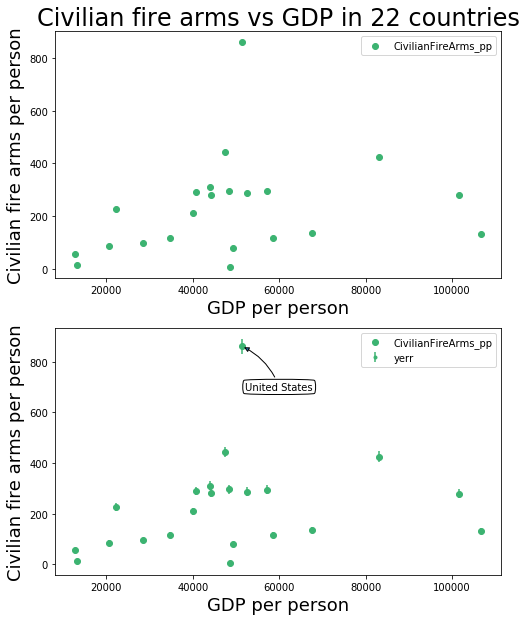

Figure 3. Average number of civilian fire arms per person, The datapoint on the top of the plot is the USA, which does not have the highest GDP per person, but has highest number of civilian fire arms per person.


In [13]:
fig = plt.figure(figsize=(8,10)) 

ax1 = fig.add_subplot(211)
scatter = ax1.scatter(df['gdp_pp'], df['CivilianFireArms_pp'], color='mediumseagreen')
ax1.set_xlabel('GDP per person', fontsize = 18)
ax1.set_ylabel('Civilian fire arms per person', fontsize = 18)
ax1.set_ylim()
ax1.legend()
plt.title("Civilian fire arms vs GDP in 22 countries", fontsize=24)

ax2 = fig.add_subplot(212)
scatter = ax2.scatter(df['gdp_pp'], df['CivilianFireArms_pp'], color='mediumseagreen')
ax2.errorbar(df['gdp_pp'], df['CivilianFireArms_pp'], 
            yerr = np.sqrt(df['CivilianFireArms_pp']*1.0), fmt = '.', color='mediumseagreen', label='yerr')
ax2.set_xlabel('GDP per person', fontsize = 18)
ax2.set_ylabel('Civilian fire arms per person', fontsize = 18)
ax2.set_ylim()
ax2.legend()
ax2.annotate('United States', 
             xy=(df['gdp_pp'][df['Country Name']=='United States'], df['CivilianFireArms_pp'][df['Country Name']=='United States']), 
             xycoords='data', xytext=(60000,700), textcoords='data', size=10, va="center", ha="center",bbox=dict(boxstyle="round4", fc="w"),
                  arrowprops=dict(arrowstyle="-|>",
                                  connectionstyle="arc3,rad=0.2"))
plt.show()
print ("Figure 3. Average number of civilian fire arms per person, " + 
       "The datapoint on the top of the plot is the USA, " + 
       "which does not have the highest GDP per person, " +
       "but has highest number of civilian fire arms per person.")

## plot the average number of homicide by fire arms per person
first as a histogram

then against the country GDP, with statistical errors. are there  points that look like outliers?

In [14]:
df['NumberOfHomicide_pp'] = df['Number of homicides by firearm'] / df['pop'] * 1e6

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


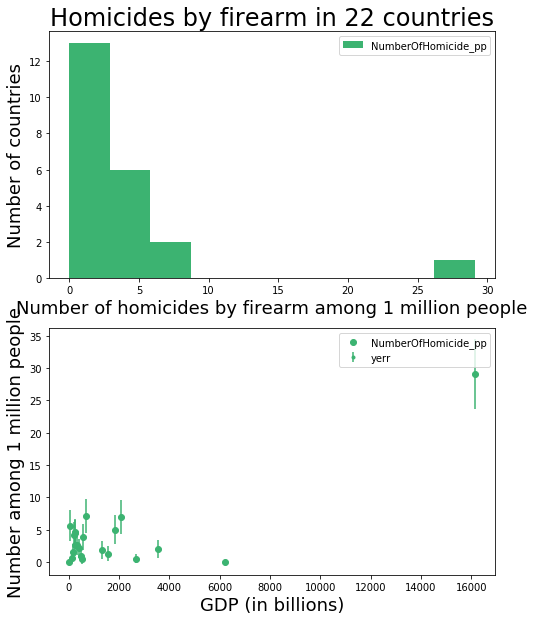

Figure 4. Number of homicides by firearm among 1 million people, The datapoint on the top right of the plot is the USA, which has the highest GDP, and highest number of homicides by firearm among 1 million people.


In [15]:
fig = plt.figure(figsize=(8,10)) 

ax1 = fig.add_subplot(211)
ax1.hist(df['NumberOfHomicide_pp'], color='mediumseagreen')
ax1.set_xlabel('Number of homicides by firearm among 1 million people', fontsize = 18)
ax1.set_ylabel('Number of countries', fontsize = 18)
ax1.set_ylim()
ax1.legend()
plt.title("Homicides by firearm in 22 countries", fontsize=24)

ax2 = fig.add_subplot(212)
scatter = ax2.scatter(df['gdp'] / 1e9, df['NumberOfHomicide_pp'], color='mediumseagreen')
ax2.errorbar(df['gdp'] / 1e9, df['NumberOfHomicide_pp'], 
            yerr = np.sqrt(df['NumberOfHomicide_pp']*1.0), fmt = '.', color='mediumseagreen', label='yerr')
ax2.set_xlabel('GDP (in billions)', fontsize = 18)
ax2.set_ylabel('Number among 1 million people', fontsize = 18)
ax2.set_ylim()
ax2.legend()

plt.show()
print ("Figure 4. Number of homicides by firearm among 1 million people, " + 
       "The datapoint on the top right of the plot is the USA, " + 
       "which has the highest GDP, " +
       "and highest number of homicides by firearm among 1 million people.")

## plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color
with and without errorbars


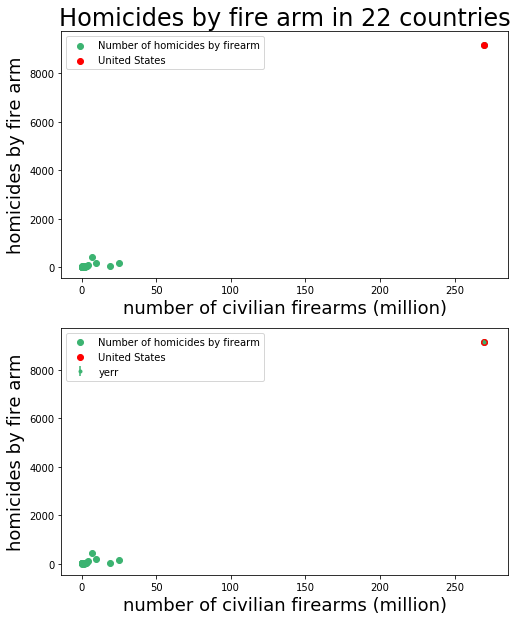

Figure 5. Number of homicides by firearm vs number of civilian firearms (million), The datapoint on the top right (marked red) of the plot is the USA, which has the highest number of civilian firearms, and has highest number of homicides by fire arm.


In [26]:
fig = plt.figure(figsize=(8,10)) 

ax1 = fig.add_subplot(211)
scatter = ax1.scatter(df['Average total all civilian firearms']/1e6, df['Number of homicides by firearm'], color='mediumseagreen')
ax1.set_xlabel('number of civilian firearms (million)', fontsize = 18)
ax1.set_ylabel('homicides by fire arm', fontsize = 18)
plt.scatter(df['Average total all civilian firearms'][df['Country Name']=='United States']/1e6, df['Number of homicides by firearm'][df['Country Name']=='United States'], label='United States', c='r')
ax1.set_ylim()
ax1.legend()
plt.title("Homicides by fire arm in 22 countries", fontsize=24)

ax2 = fig.add_subplot(212)
scatter = ax2.scatter(df['Average total all civilian firearms']/1e6, df['Number of homicides by firearm'], color='mediumseagreen')
ax2.errorbar(df['Average total all civilian firearms']/1e6, df['Number of homicides by firearm'], 
            yerr = np.sqrt(df['Number of homicides by firearm']*1.0), fmt = '.', color='mediumseagreen', label='yerr')
plt.scatter(df['Average total all civilian firearms'][df['Country Name']=='United States']/1e6, df['Number of homicides by firearm'][df['Country Name']=='United States'], label='United States', c='r')
ax2.set_xlabel('number of civilian firearms (million)', fontsize = 18)
ax2.set_ylabel('homicides by fire arm', fontsize = 18)
ax2.set_ylim()
ax2.legend()
#ax2.annotate('United States', 
#             xy=(df['gdp_pp'][df['Country Name']=='United States'], df['CivilianFireArms_pp'][df['Country Name']=='United States']), 
#             xycoords='data', xytext=(60000,700), textcoords='data', size=10, va="center", ha="center",bbox=dict(boxstyle="round4", fc="w"),
#                  arrowprops=dict(arrowstyle="-|>",
#                                  connectionstyle="arc3,rad=0.2"))
plt.show()
print ("Figure 5. Number of homicides by firearm vs number of civilian firearms (million), " + 
       "The datapoint on the top right (marked red) of the plot is the USA, " + 
       "which has the highest number of civilian firearms, " +
       "and has highest number of homicides by fire arm.")

## plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color
with and without errorbars


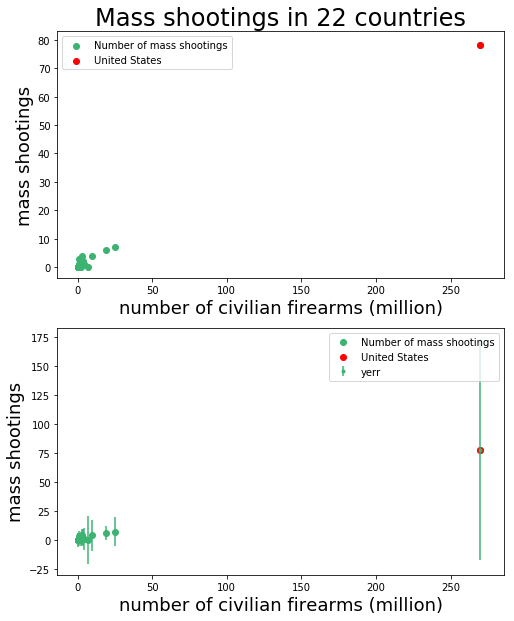

Figure 6. Number of mass shootings vs number of civilian firearms (million), The datapoint on the top right (marked red) of the plot is the USA, which has the highest number of civilian firearms, and has highest number of mass shootings.


In [28]:
fig = plt.figure(figsize=(8,10)) 

ax1 = fig.add_subplot(211)
scatter = ax1.scatter(df['Average total all civilian firearms']/1e6, df['Number of mass shootings'], color='mediumseagreen')
ax1.set_xlabel('number of civilian firearms (million)', fontsize = 18)
ax1.set_ylabel('mass shootings', fontsize = 18)
plt.scatter(df['Average total all civilian firearms'][df['Country Name']=='United States']/1e6, df['Number of mass shootings'][df['Country Name']=='United States'], label='United States', c='r')
ax1.set_ylim()
ax1.legend()
plt.title("Mass shootings in 22 countries", fontsize=24)

ax2 = fig.add_subplot(212)
scatter = ax2.scatter(df['Average total all civilian firearms']/1e6, df['Number of mass shootings'], color='mediumseagreen')
ax2.errorbar(df['Average total all civilian firearms']/1e6, df['Number of mass shootings'], 
            yerr = np.sqrt(df['Number of homicides by firearm']*1.0), fmt = '.', color='mediumseagreen', label='yerr')
plt.scatter(df['Average total all civilian firearms'][df['Country Name']=='United States']/1e6, df['Number of mass shootings'][df['Country Name']=='United States'], label='United States', c='r')
ax2.set_xlabel('number of civilian firearms (million)', fontsize = 18)
ax2.set_ylabel('mass shootings', fontsize = 18)
ax2.set_ylim()
ax2.legend()
#ax2.annotate('United States', 
#             xy=(df['gdp_pp'][df['Country Name']=='United States'], df['CivilianFireArms_pp'][df['Country Name']=='United States']), 
#             xycoords='data', xytext=(60000,700), textcoords='data', size=10, va="center", ha="center",bbox=dict(boxstyle="round4", fc="w"),
#                  arrowprops=dict(arrowstyle="-|>",
#                                  connectionstyle="arc3,rad=0.2"))
plt.show()
print ("Figure 6. Number of mass shootings vs number of civilian firearms (million), " + 
       "The datapoint on the top right (marked red) of the plot is the USA, " + 
       "which has the highest number of civilian firearms, " +
       "and has highest number of mass shootings.")

# Modeling

## fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person. 
Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity). (You can simply divide by the order of magnitude of the mean of the sample to obtain this). Use

    - statsmodels OLS
    - statsmodels WLS
    - seaborn
    - choose one of
        -- creating a function that calculates the residuals and minimizing that function
        -- analytical solution http://mathworld.wolfram.com/LeastSquaresFitting.html
        -- numpy.polyfit() - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html
    

WLS: that is the weighted square fit. The statsmodel package WLS function allows you to take the uncertainties of each data point into account when you fit your model. It takes the parameter weights, which is the inverse of your errors:
weights = 1.0/df.yerror
Notice that 
    a - sqrt(0) = 0
    b - 1/0 = infinity
    c - you cannot have weight that are infinity in your fit. Please come up with a solution and justify it.


the latter three you can learn about in this example: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/genderIncomeBias.ipynb
Since we did not discuss these, I will add some notes to the repo in the afternoon.

Use the seaborn python package built in regression function  to plot the regression confidence intervals. 

import seaborn  as sns
sns.regplot(x="x", y="y", data=df);




## Extra credit: calculate the confidence interval by hand and also plot them 
you can use pylab.fill_between(x, yfit - ci, yfit + ci, alpha=0.5)

**Confidence intervals: **
there are three type of intervals in a linear regression, plot any one of them all three if you want - how do they compare to the seaborn plot?:

1) Confidence intervals for the parameters slope and intercept

2) Confidence interval for the average y value

3) Prediction interval for a single y value

1) __confidence interval of the  model parameters slope and intercept:__
define sigma as the sum of the residuals over the square root of number n of observations. 

sigma: σ̂ =sqrt(Sum((Yoberved_i−Ypredicted_i)^2)/n)

where the sum is over all observations

Define t_alpha/2,n-2 the t statistics at (1-alpha/2) for a t distribution with n-2 degrees of freedom (you can calculate it with scipy
tp = sp.stats.t.ppf(0.975, n-2)



In [16]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression.png")

FileNotFoundError: [Errno 2] No such file or directory: '../Lab5_fb55/confidence_intervals_regression.png'

In [ ]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression2.png")

[proof](https://onlinecourses.science.psu.edu/stat414/node/280)

2) **A confidence interval for E(y | x) , the expected (average) value of y for a given x_**

define s: residual standard error sy = sqrt(Sum((y_observed-y_predicted)^2)/(n-2))

(note: n-2 is the degrees of freedom of the problem: observations - number of parameters - 1)

the confidence interval for a given y(x*) is: 

y_predicted(x*) +/- t_(alpha/2)(n-2) * sy * sqrt( 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

In [ ]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciY.png")

3) **Confidence intervals for average y (predicted) values**

y_predicted(x*) +/- t_(n-2) * sy * sqrt( 1 + 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

very similar, but note the +1 in the square root

In [ ]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciYaverage.png")

In [ ]:
pl.figure()
import seaborn  as sns
sns.regplot(x="x", y="y", data=df_);

pl.ylabel("Mass shootings")
pl.xlabel("Fire arms");

## Use the stsatsmodels.gaphics package to plot the influence plot. 
Read the package documentation to learn how to read this plot and extract the countries with the highest influence

This is the topic of this week's assigned reading, so make sure you do the reading before you do this step. It will help you interpret the plot.

In [ ]:
sm.graphics.influence_plot(modelOLS, alpha  = 0.05, criterion="cooks");

## Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences

## Discuss your findings